In [ ]:
# !pip install tensorflow
import tensorflow
tensorflow.__version__

In [ ]:
# !pip install keras
import keras 
keras.__version__

In [1]:
from keras.models import Sequential
from keras.layers import Dense #hidden layers 
import numpy
#neural network doesn't understand pandas dataframe i.e,we use numpy

In [5]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset_new = numpy.loadtxt("https://raw.githubusercontent.com/slmsshk/pima-indians-diabetes.data.csv/main/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset_new[:,0:8]#every column except 8
Y = dataset_new[:,8]#only column 8


In [9]:
len(dataset_new)

768

In [11]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=8,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(10,  activation='relu')) #3nd layer
model.add(Dense(1, activation='sigmoid')) #4th layer or output layer

C:\Users\Manav Kumar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 511 (2.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4415 - loss: 8.6389 - val_accuracy: 0.4921 - val_loss: 3.2118
Epoch 2/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4165 - loss: 3.1583 - val_accuracy: 0.4646 - val_loss: 2.0498
Epoch 3/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5361 - loss: 1.7113 - val_accuracy: 0.5276 - val_loss: 1.4943
Epoch 4/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6075 - loss: 1.1545 - val_accuracy: 0.4488 - val_loss: 1.3302
Epoch 5/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5688 - loss: 1.0966 - val_accuracy: 0.5315 - val_loss: 1.0593
Epoch 6/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5984 - loss: 0.9019 - val_accuracy: 0.6142 - val_loss: 0.9141
Epoch 7/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5910 - loss: 0.9360 - val_accuracy: 0.5315 - val_loss: 0.9869
Epoch 8/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5966 - loss: 0.7674 - val_accuracy: 0.6181 - 

In [19]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8075 - loss: 0.4285 
compile_metrics: 78.78%


In [21]:
# Visualize training history

# list all data in history
history.history.keys()



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

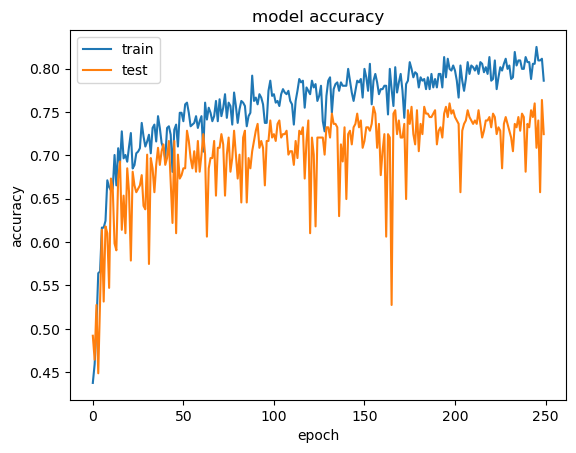

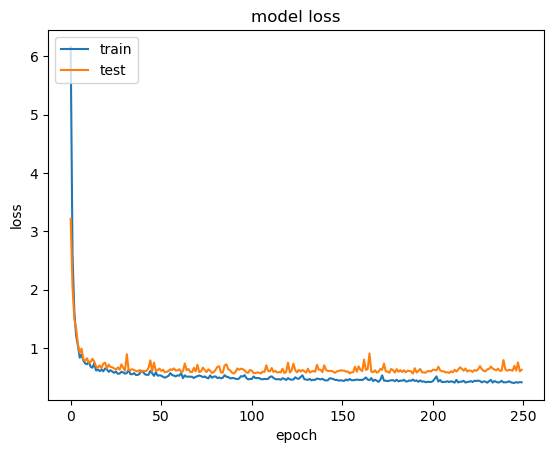

In [23]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
